Saving baru.jpg to baru (1).jpg


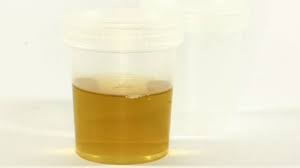

1/1 [==============================] - 0s 241ms/step
The predicted class is: Kuning
Confidence score (accuracy): 99.22%


In [7]:
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
from google.colab import files
from IPython.display import Image

# Load the pre-trained model
model = tf.keras.models.load_model('model.h5')

def preprocess_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Upload image file in Colab
uploaded = files.upload()

# Get the first uploaded image file
image_files = list(uploaded.keys())
if not image_files:
    print("No image file uploaded.")
else:
    # Take the first uploaded image
    image_path = image_files[0]

    # Display the uploaded image
    display(Image(filename=image_path))

    # Preprocess the input image
    preprocessed_image = preprocess_image(image_path)

    # Make predictions using the model
    predictions = model.predict(preprocessed_image)

    # Define class labels
    class_labels = ['Biru', 'Coklat', 'Hijau', 'Hitam', 'Jingga', 'Kuning', 'Merah', 'Putih']

    # Get the predicted class index and label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the confidence score (accuracy)
    confidence_score = predictions[0][predicted_class_index] * 100

    # Print the results
    print(f'The predicted class is: {predicted_class_label}')
    print("Confidence score (accuracy): {:.2f}%".format(confidence_score))